<img src="HH_single_neuron.png">

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
writer = tf.summary.FileWriter('./')

In [2]:
num_iterations = 1000
num_neurons = 2

In [3]:
def fIs(v, vi):
    #Todo
    return

In [4]:
ve = tf.constant(-60.)
c1 = tf.constant(0.1)
c2 = tf.constant(0.1)

def fIl1(v):
#     return tf.multiply(c, tf.subtract(ve,v))
    return c1*(ve-v)

def fIl2(v):
#     return tf.multiply(c, tf.subtract(ve,v))
    return c2*(ve-v)

In [5]:
h_cons = tf.constant(0.01)
h_by_two_cons = tf.constant(0.005)
one_by_six_cons = tf.constant(tf.divide(1, 6))
two_cons = tf.constant(2.)

def call_currents(v, n, h, t, step_input):    
#     INa, Ik, dn, dh = fINaK(v, n, h)
    
    Il1 = fIl1(v)
    Il2 = fIl2(v)
    
#     dv = INa + Ik + Il #+ step_input
    dv = Il1
    
    return [dv, tf.Variable(np.array([-0.]*num_neurons), dtype=tf.float32), 
            tf.Variable(np.array([0.]*num_neurons), dtype=tf.float32)]

def neuron_combined_steps(prev_state, step_input):
    v, n, h, t = prev_state
      
    v_1, n_1, h_1 = call_currents(v, n, h, t, step_input)
    
    v_2_in = tf.add(tf.multiply(h_by_two_cons, v_1), v)
    n_2_in = tf.add(tf.multiply(h_by_two_cons, n_1), n)
    h_2_in = tf.add(tf.multiply(h_by_two_cons, h_1), h)
    t_2_in = tf.add(t, h_by_two_cons)
    v_2, n_2, h_2 = call_currents(v_2_in, n_2_in, h_2_in, t_2_in, step_input)

    v_3_in = tf.add(tf.multiply(h_by_two_cons, v_2), v)
    n_3_in = tf.add(tf.multiply(h_by_two_cons, n_2), n)
    h_3_in = tf.add(tf.multiply(h_by_two_cons, h_2), h)
    t_3_in = tf.add(t, h_by_two_cons)
    v_3, n_3, h_3 = call_currents(v_3_in, n_3_in, h_3_in, t_3_in, step_input)

    v_4_in = tf.add(tf.multiply(h, v_2), v)
    n_4_in = tf.add(tf.multiply(h, n_2), n)
    h_4_in = tf.add(tf.multiply(h, h_2), h)
    t_4_in = tf.add(t, h_cons)
    v_4, n_4, h_4 = call_currents(v_4_in, n_4_in, h_4_in, t_4_in, step_input)

      
    v_next = tf.add(tf.multiply(one_by_six_cons, tf.add_n([v_1, tf.multiply(two_cons, v_2),
                                                           tf.multiply(two_cons, v_3), v_4])), v)
    n_next = tf.add(tf.multiply(one_by_six_cons, tf.add_n([n_1, tf.multiply(two_cons, n_2),
                                                           tf.multiply(two_cons, n_3), n_4])), n)
    h_next = tf.add(tf.multiply(one_by_six_cons, tf.add_n([h_1, tf.multiply(two_cons, h_2),
                                                           tf.multiply(two_cons, h_3), h_4])), h)
    
    return [v_next, n_next, h_next, t+1]

In [6]:
# inputs to the neurons
inp = 0.05
inputs = tf.Variable(np.array([[inp] + [0.]*(num_neurons-1)] * num_iterations), dtype=tf.float32)

# initial activations and the combined input from synaptic connections
v_initial = tf.Variable(np.array([-40.]*num_neurons), dtype=tf.float32)
n_initial = tf.Variable(np.array([-40.]*num_neurons), dtype=tf.float32)
h_initial = tf.Variable(np.array([-40.]*num_neurons), dtype=tf.float32)
t = tf.constant(0.)

initial_state = [v_initial, n_initial, h_initial, t]

# recurrent execution. will iterate to the size of the inputs
out = tf.scan(neuron_combined_steps, inputs, initializer=initial_state)

In [7]:
%%time
# running the tensorflow graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer.add_graph(sess.graph)
    iteration_vals = sess.run(out)

CPU times: user 583 ms, sys: 330 ms, total: 913 ms
Wall time: 497 ms


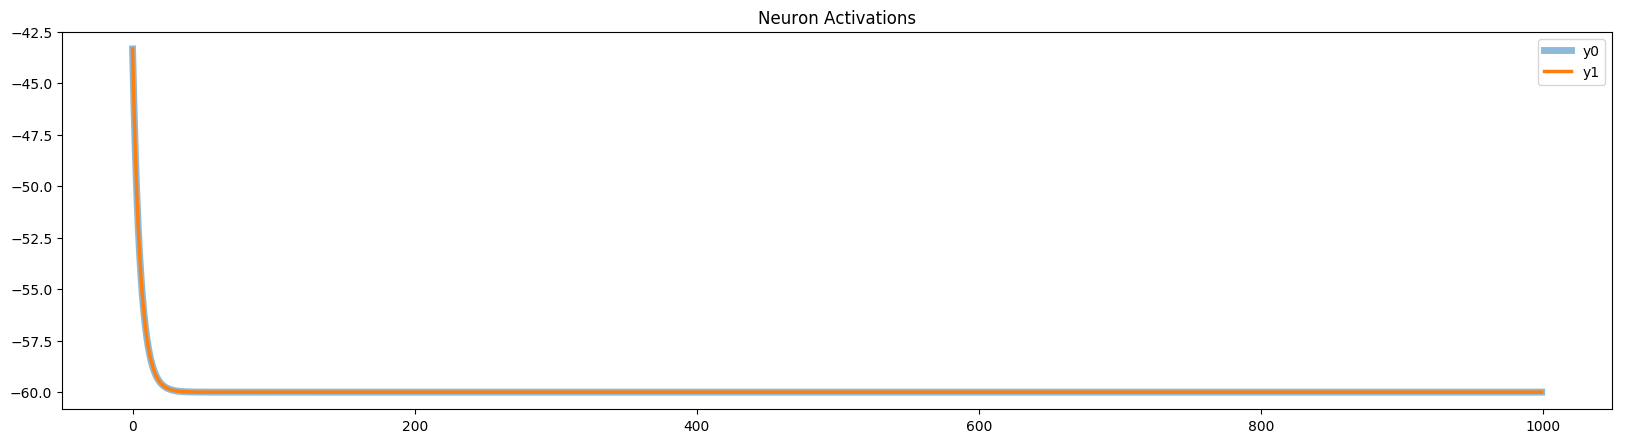

In [8]:
plt.figure(figsize=(20,5))
plt.title('Neuron Activations')
for i in range(num_neurons):
    plt.plot([y[i] for y in iteration_vals[0]], label='y'+str(i), alpha=(i+1.0)/(num_neurons),
             linewidth=5*(num_neurons-i)/(num_neurons))
plt.legend()
plt.show()